In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Share prices are often assumed to follow a random process called a **generalized weiner process.**
Here we assume a positive return of the month $r = 0.05 (5\%)$ and the volatility around this return which we denote as $\sigma = 0.4$.
Then change in the share price $dS_T$ is: $$ dS_T = rS_TdT + \sigma S_T dW_T $$.
Where $dW_T$ is a wiener process.

with *Ito's lemma* we can derive the share price at time T $$ S_T = S_0 exp(r- \frac{1}{2} \sigma^2)T + \sigma \sqrt{T}W_T $$ 


In [6]:
# set a random variable

np.random.seed(145)

S0 = 500 # initial price
K = 750 # strike price

r = 0.05 # average return of the underlying asset 
sigma = 0.4 # volatility
T = 1 # time till execution
t = 30 # number of time steps, 30 days in a month
dt = T/t 
M = 1000 # number of paths to simulate

# simulating M paths with t time steps.

S = S0 * np.exp(np.cumsum((r - 0.5 * sigma **2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal((t+1, M)), axis = 0))
print(S)
P_call = sum(np.maximum(S[-1] - K, 0)) / M

print("The call option values is: {:0.4f} rupees .\n".format(P_call))

[[ 470.1698662   501.70772989  545.36020623 ...  475.41278174
   464.56904163  507.09323449]
 [ 429.70377051  452.93118594  534.47367238 ...  426.17626636
   443.77156172  455.03535208]
 [ 439.35111707  423.51123699  565.74656347 ...  486.03085557
   425.4935368   519.75963725]
 ...
 [ 693.57580713  170.39576543 1127.51425418 ...  379.14188406
   726.98085141  529.08345659]
 [ 798.53795142  171.85723235 1263.7447822  ...  372.69982495
   718.95692338  585.71124089]
 [ 794.25071637  165.74301503 1190.41054041 ...  351.8972427
   755.57536715  679.55348754]]
The call option values is: 25.0022 rupees .



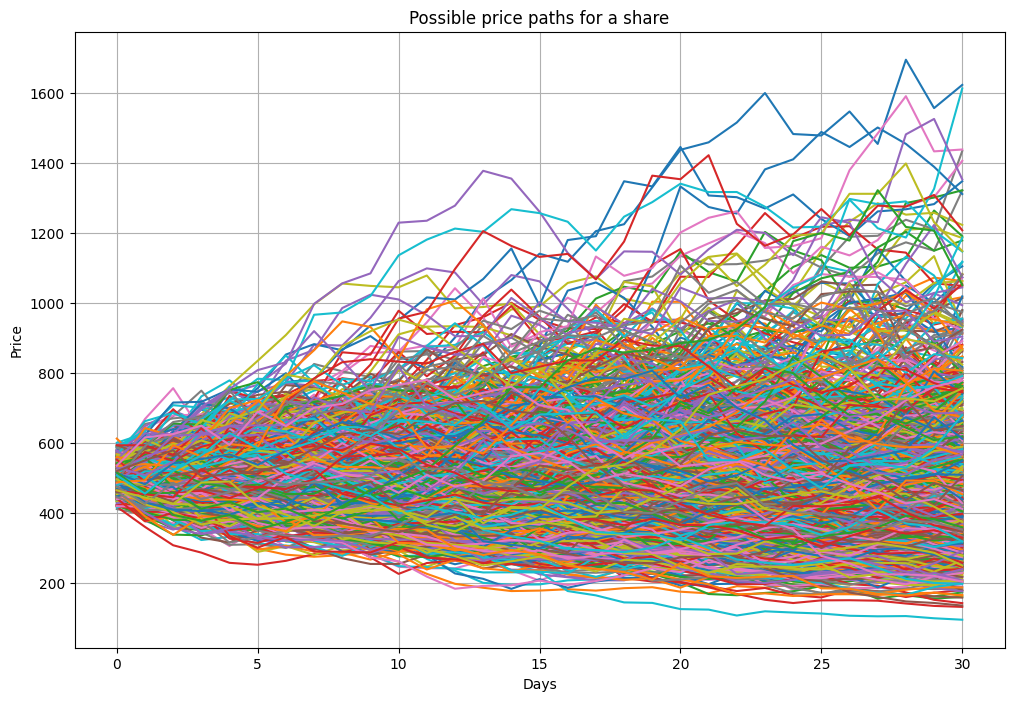

In [4]:
num_paths_to_plot = M
plt.figure(figsize= (12, 8))
plt.plot(S[:, :num_paths_to_plot])
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Possible price paths for a share')
plt.show()

Frequency of the simulated index levels at the end of the simulation period.

Text(0, 0.5, 'Frequency')

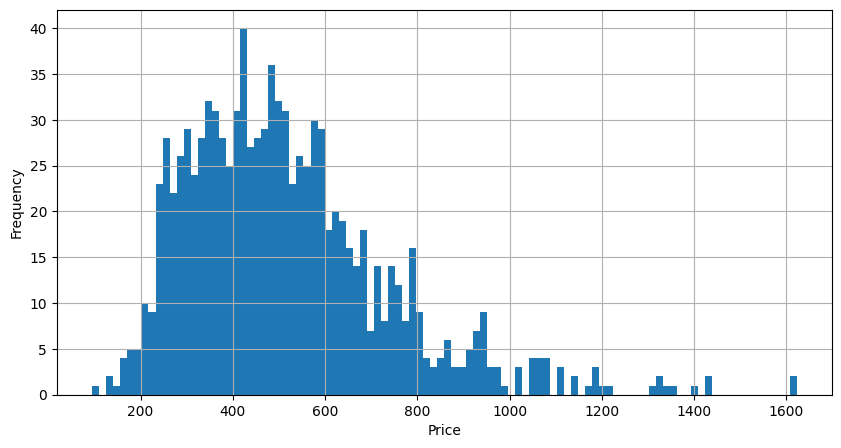

In [5]:
plt.figure(figsize= (10, 5) )
plt.hist(S[-1], bins =100)
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Frequency')

Histogram of all simulated end-of-period option values.

Text(0, 0.5, 'frequency')

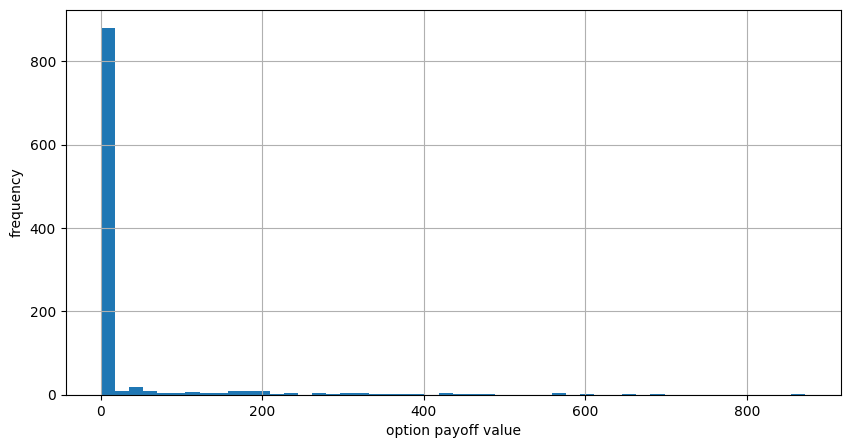

In [8]:
plt.figure(figsize= (10, 5))
plt.hist(np.maximum(S[-1] - K, 0), bins = 50)
plt.grid(True)
plt.xlabel('option payoff value')
plt.ylabel('frequency')

0 1
